<a href="https://colab.research.google.com/github/syedatif4118/iris-decision-tree-6-features/blob/main/ML_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://drive.google.com/drive/folders/11NfF84XtZKVt1WIAPx_kb7rJPTM4lktI
!pip uninstall gdown -y && pip install gdown
!gdown --folder https://drive.google.com/drive/folders/11NfF84XtZKVt1WIAPx_kb7rJPTM4lktI

Found existing installation: gdown 4.4.0
Uninstalling gdown-4.4.0:
  Successfully uninstalled gdown-4.4.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14774 sha256=560767bc4cb35b032238094d83a1e28849a557dd71a5ce42e089bab34088366d
  Stored in directory: /root/.cache/pip/wheels/fb/c3/0e/c4d8ff8bfcb0461afff199471449f642179b74968c15b7a69c
Successfully built gdown
Retrieving folder list
Processing file 1iphCPSA74BiqVx2huq3wI2gUzxKVhRmv dataset_1.csv
Processing file 1SQmbf8QjZZi8j-B0nUdQ2lmq7oLp1VRV dataset_2.csv
Processing file 1sOtKwUgdctiOc_vwSImjKwKS0SR0sLKk dataset_3.csv
Processing file 1Yi62psryxFY7-_HzkdumON8ZJ1El0Nh7 dataset_4.csv
Processing file 15zFpFtmteRA8Sikqx_aKpDqkBcewczG4 readme.txt
Retrieving folder list completed
Building directo

In [ ]:
import pandas as pd
import glob
import io
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:

df = pd.read_csv(r'/content/ML_round_dataset/dataset_2.csv')
df

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Target
0,1,6.1,4,4.4,4.2,0,5.5,Class_1
1,2,5.9,1,4.4,4.2,3,5.0,Class_1
2,3,5.7,4,4.3,4.2,2,5.2,Class_1
3,4,5.6,2,4.5,4.2,0,5.1,Class_1
4,5,6.0,5,4.4,4.2,1,5.6,Class_1
...,...,...,...,...,...,...,...,...
145,146,7.7,0,8.2,6.3,3,5.0,Class_3
146,147,7.3,4,8.0,5.9,0,4.5,Class_3
147,148,7.5,0,8.2,6.0,1,5.0,Class_3
148,149,7.2,1,8.4,6.3,0,5.4,Class_3


In [ ]:
df.shape

(150, 8)

In [ ]:
df['Target'].value_counts()

Class_1    50
Class_2    50
Class_3    50
Name: Target, dtype: int64

##Data Cleaning

In [ ]:
df.isnull().any().any()

False

In [ ]:
df.columns
cols = list(df.columns)
cols

['Id',
 'Feature_1',
 'Feature_2',
 'Feature_3',
 'Feature_4',
 'Feature_5',
 'Feature_6',
 'Target']

##Plotting

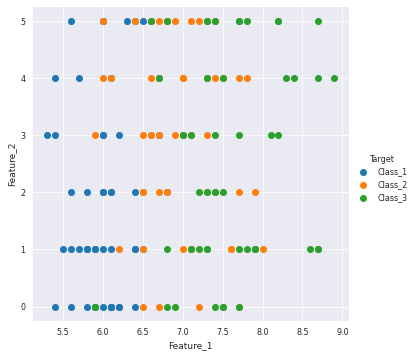

In [ ]:
sns.set_context(font_scale=2, rc={'font.size':8, 'axes.labelsize':9})
sns.set_style('darkgrid')
sns.FacetGrid(df, hue='Target', height=5)\
.map(plt.scatter, 'Feature_1', 'Feature_2')\
.add_legend()

plt.show()

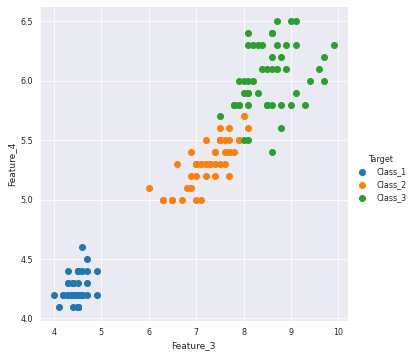

In [ ]:
sns.set_context(font_scale=2, rc={'font.size':8, 'axes.labelsize':9})
sns.set_style('darkgrid')
sns.FacetGrid(df, hue='Target', height=5)\
.map(plt.scatter, 'Feature_3', 'Feature_4')\
.add_legend()

plt.show()

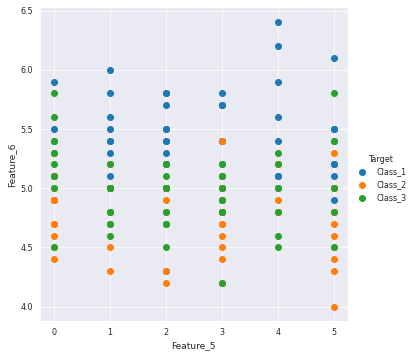

In [ ]:
sns.set_context(font_scale=2, rc={'font.size':8, 'axes.labelsize':9})
sns.set_style('darkgrid')
sns.FacetGrid(df, hue='Target', height=5)\
.map(plt.scatter, 'Feature_5', 'Feature_6')\
.add_legend()

plt.show()

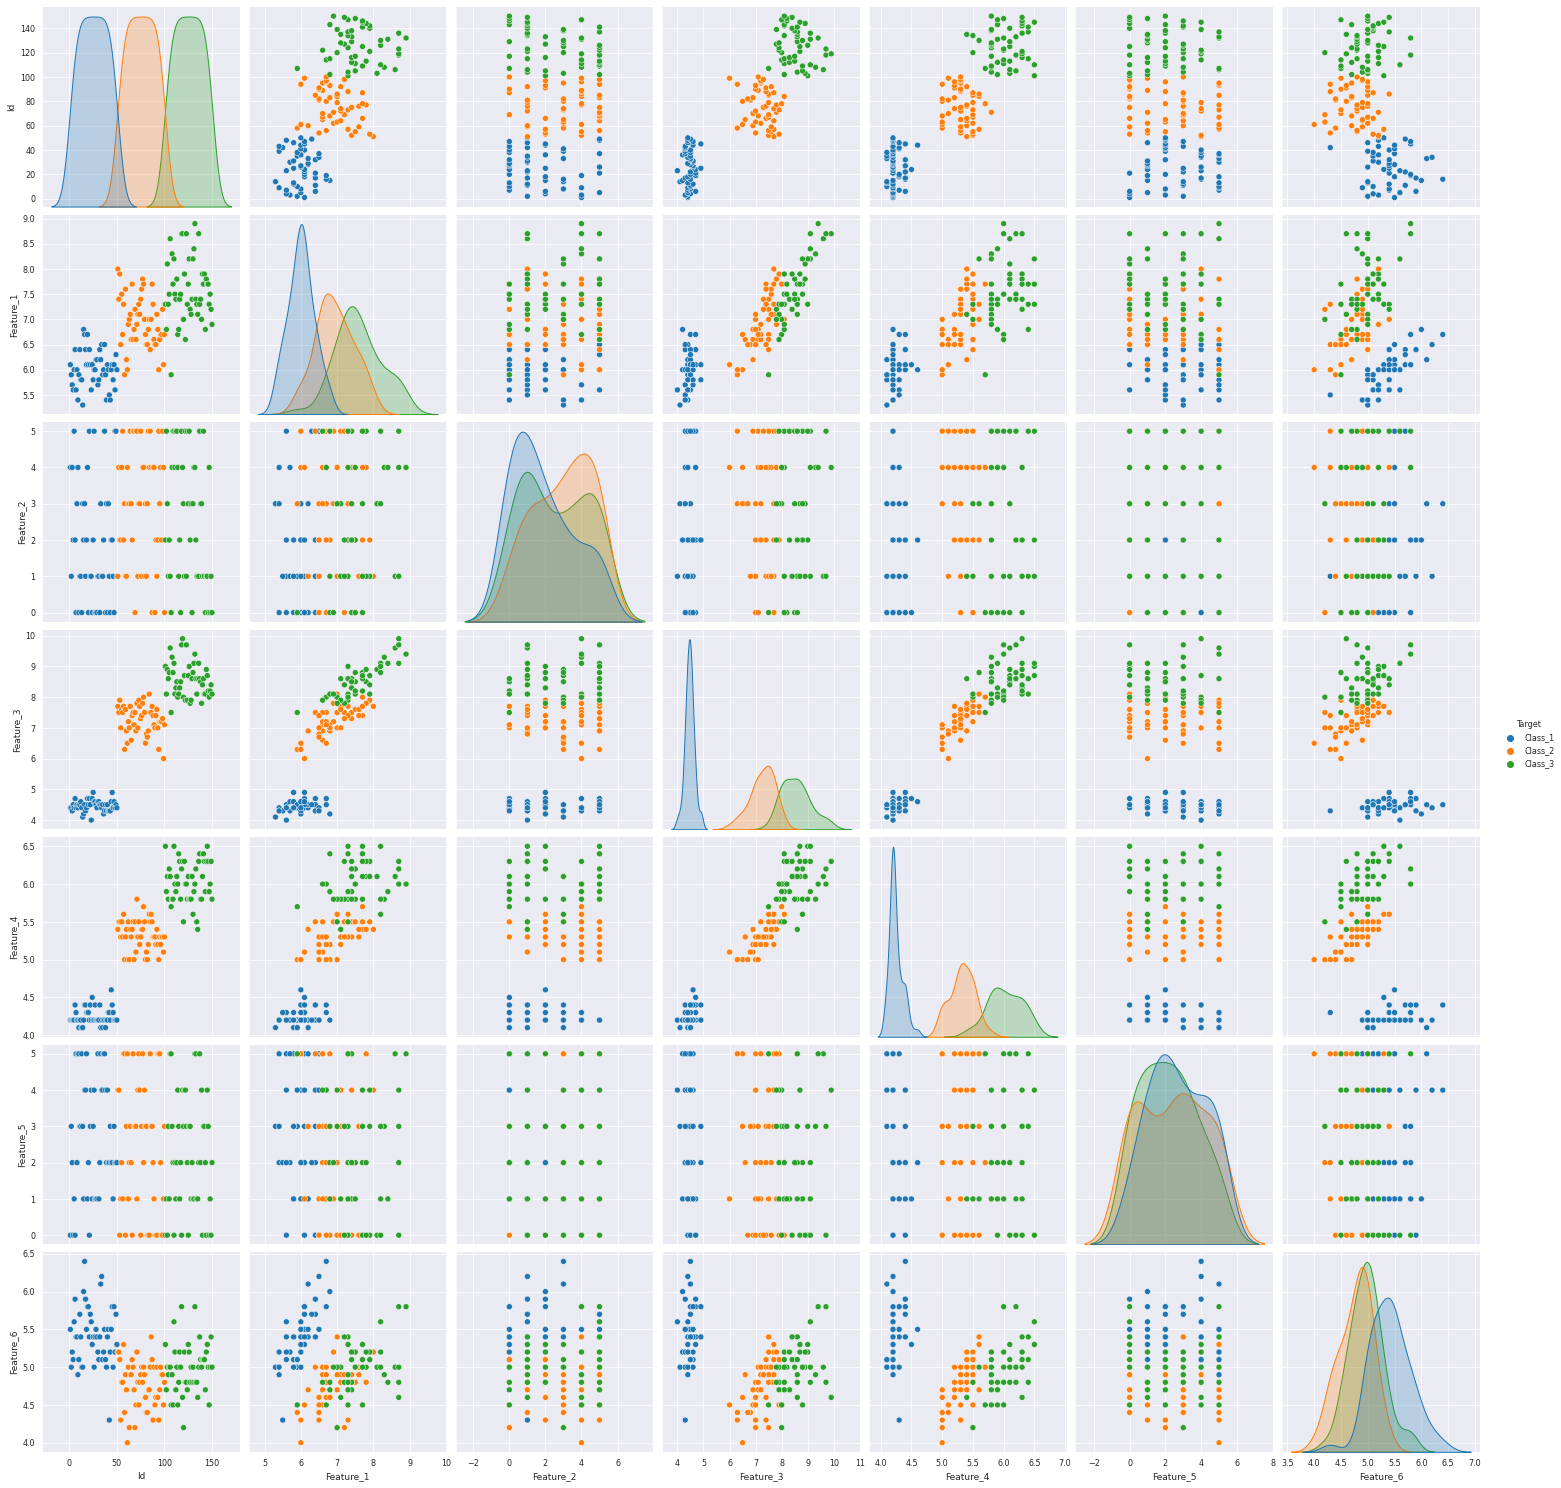

In [ ]:
sns.pairplot(df, hue='Target', height=3)

In [ ]:
df.Target

0      Class_1
1      Class_1
2      Class_1
3      Class_1
4      Class_1
        ...   
145    Class_3
146    Class_3
147    Class_3
148    Class_3
149    Class_3
Name: Target, Length: 150, dtype: object

##Linear Regression

In [ ]:
x_values = df['Feature_1'].copy()
y_values = df['Feature_2'].copy()
x1_values = df['Feature_3'].copy()
y2_values = df['Feature_4'].copy()
x3_values = df['Feature_5'].copy()
y4_values = df['Feature_6'].copy()

##Regression Libraries

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:

x_train, x_test, y_train1, y_test1 = train_test_split(x_values, y_values, test_size = 0.33, random_state = 3)

##Adding dummy values

In [ ]:
target_dummy = pd.get_dummies(df["Target"])
target_dummy.head()

,Class_1,Class_2,Class_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
assigned_data = df.copy()

In [ ]:
assigned_data = pd.concat([df, target_dummy], axis = 1)
assigned_data.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Target,Class_1,Class_2,Class_3
0,1,6.1,4,4.4,4.2,0,5.5,Class_1,1,0,0
1,2,5.9,1,4.4,4.2,3,5.0,Class_1,1,0,0
2,3,5.7,4,4.3,4.2,2,5.2,Class_1,1,0,0
3,4,5.6,2,4.5,4.2,0,5.1,Class_1,1,0,0
4,5,6.0,5,4.4,4.2,1,5.6,Class_1,1,0,0


In [ ]:
target = ['Class_1','Class_2', 'Class_3']
features = cols[1:7]
print(target)
print(features)

['Class_1', 'Class_2', 'Class_3']
['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6']


In [ ]:
y = assigned_data[target].copy()
X = assigned_data[features].copy()

##Dividing into test and train data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

In [ ]:
print(X_train.describe())
X_train.head()

        Feature_1   Feature_2   Feature_3   Feature_4   Feature_5   Feature_6
count  135.000000  135.000000  135.000000  135.000000  135.000000  135.000000
mean     6.869630    2.444444    6.814815    5.221481    2.429630    5.055556
std      0.814997    1.760540    1.746960    0.760733    1.673056    0.428581
min      5.300000    0.000000    4.000000    4.100000    0.000000    4.000000
25%      6.100000    1.000000    4.600000    4.300000    1.000000    4.800000
50%      6.800000    2.000000    7.500000    5.400000    2.000000    5.000000
75%      7.400000    4.000000    8.100000    5.800000    4.000000    5.300000
max      8.900000    5.000000    9.700000    6.500000    5.000000    6.200000


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6
40,6.0,3,4.3,4.3,2,5.5
72,7.3,3,7.9,5.5,5,4.5
135,8.7,1,9.1,6.3,2,5.0
113,6.7,4,8.0,6.0,4,4.5
42,5.4,0,4.3,4.2,3,5.2


In [ ]:
y_train.head(10)

,Class_1,Class_2,Class_3
40,1,0,0
72,0,1,0
135,0,0,1
113,0,0,1
42,1,0,0
126,0,0,1
112,0,0,1
141,0,0,1
76,0,1,0
5,1,0,0


In [ ]:
classifier = DecisionTreeClassifier(max_leaf_nodes = 4, random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)

In [ ]:
y_prediction = classifier.predict(X_test)

In [ ]:
y_test[0:10]

,Class_1,Class_2,Class_3
47,1,0,0
3,1,0,0
31,1,0,0
25,1,0,0
15,1,0,0
118,0,0,1
89,0,1,0
6,1,0,0
103,0,0,1
65,0,1,0


##Accuracy of the Classifier

In [ ]:
accuracy_score(y_true = y_test, y_pred = y_prediction)

1.0

##Confusion matrix, recall and f1

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3

   micro avg       1.00      1.00      1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15
 samples avg       1.00      1.00      1.00        15

